<a href="https://colab.research.google.com/github/MikelCerio/2024-Data-Science/blob/develop/Proyecto_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos todos los paquetes que vayamos a necesitar
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Os dejamos en el apartado de datos de Teoría información sobre la vivienda en Boston. Un conjunto de datos con los siguientes campos informados:
#
#     1. CRIM     Crimen per cápita por ciudad
#     2. ZN       Proporción de zona marcada como residencial para espacios superiores 25,000 sq.ft.
#     3. INDUS    Proporción de acres comerciales no minoristas por ciudad
#     4. CHAS     Variable Charles River dummy (= 1 si el trazado limita con el río; 0 otro)
#     5. NOX      Concentración de óxidos nítricos (partes por 10 millones)
#     6. RM       Número medio de habitaciones por vivienda
#     7. AGE      Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
#     8. DIS      Distancias ponderadas a cinco centros de empleo de Boston
#     9. RAD      Índice de accesibilidad a las autopistas radiales
#     10. TAX      Tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares
#     11. PTRATIO  Ratio alumnos-profesor por ciudad
#     12. B        1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
#     13. LSTAT    % estatus inferior de la población
#     14. PRICE    Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boston_house_prices.csv')

In [ ]:
df_boston = pd.DataFrame(df)

df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
#Analizamos como se distribuyen las variables estadisticamente

print(df_boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

Algunas variables tienen una alta dispersión, como CRIM (desviación estándar de 8.6), ZN (desviación estándar de 23.3) y TAX (desviación estándar de 168.5), lo que indica una gran variabilidad entre los vecindarios.

Otras variables, como NOX (desviación estándar de 0.12) y PTRATIO (desviación estándar de 2.16), tienen una menor dispersión, indicando una mayor homogeneidad entre los vecindarios.

Hay variables con distribuciones sesgadas, como CRIM (mínimo de 0.006 y máximo de 88.98) y PRICE (mínimo de 5,000 y máximo de 50,000), donde la mediana se encuentra más cerca del cuartil inferior que del superior.

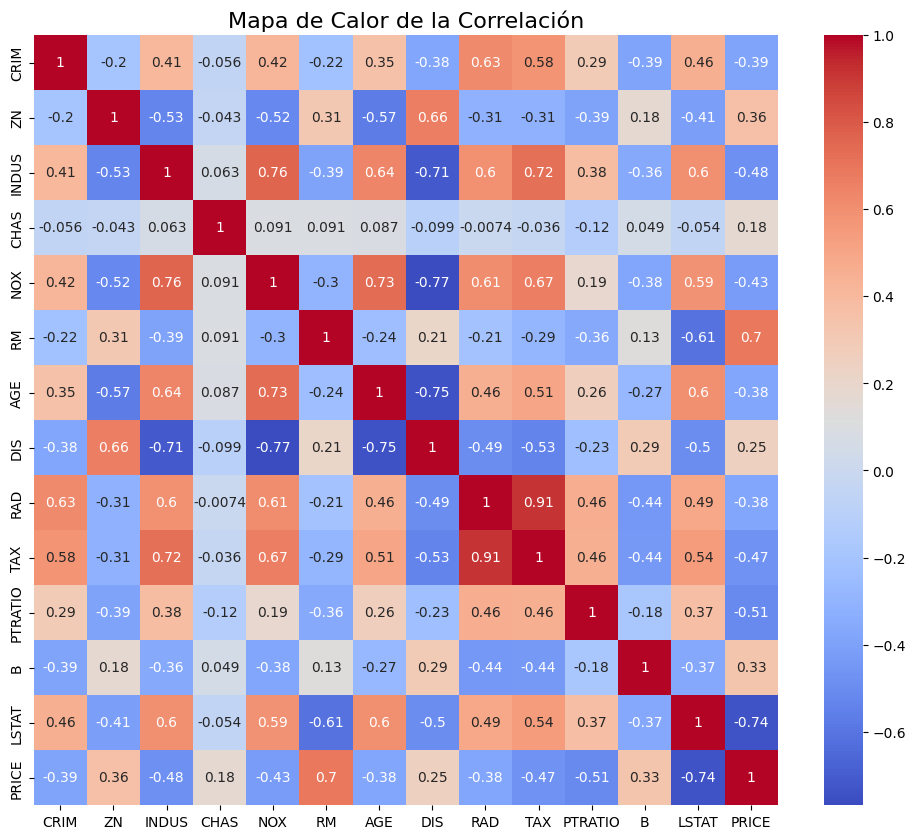

In [ ]:
corr = df_boston.corr()

# %%
# Mediante un mapa de calor vamos a ver mejor como son estas correlaciones

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Correlación', fontsize=16)
plt.show()

En este mapa de calor de correlaciones, puedo observar varias correlaciones interesantes y significativas que vale la pena destacar:

1. Correlación fuerte positiva entre RAD (accesibilidad a autopistas radiales) y TAX (impuestos a la propiedad): 0.91
   - Esta alta correlación sugiere que en vecindarios con mejor acceso a las principales autopistas, los impuestos a la propiedad tienden a ser más altos. Esto podría deberse a que estas áreas son más valoradas y tienen propiedades de mayor valor, lo que se traduce en impuestos más altos.

2. Correlación fuerte positiva entre NOX (concentración de óxidos de nitrógeno) e INDUS (proporción de área industrial): 0.76
   - Esta correlación indica que los vecindarios con mayor proporción de área industrial tienden a tener niveles más altos de contaminación por óxidos de nitrógeno. Esto es razonable, ya que las actividades industriales suelen ser una fuente significativa de emisiones de NOX.

3. Correlación fuerte negativa entre AGE (antigüedad de viviendas) y RM (número promedio de habitaciones): -0.77
   - Esta correlación negativa sugiere que las viviendas más antiguas tienden a tener un menor número promedio de habitaciones en comparación con las viviendas más nuevas. Esto podría estar relacionado con los cambios en los estándares de construcción y los estilos arquitectónicos a lo largo del tiempo.

4. Correlación moderada positiva entre RM (número promedio de habitaciones) y PRICE (valor mediano de las viviendas): 0.70
   - Esta correlación indica que, en general, las viviendas con un mayor número de habitaciones tienden a tener un valor más alto en el mercado inmobiliario. Esto tiene sentido, ya que las viviendas más grandes suelen ser más valoradas.

5. Correlación moderada negativa entre LSTAT (porcentaje de población de bajos ingresos) y PRICE (valor mediano de las viviendas): -0.74
   - Esta correlación negativa sugiere que en vecindarios con un mayor porcentaje de población de bajos ingresos, el valor mediano de las viviendas tiende a ser más bajo. Esto puede estar relacionado con factores socioeconómicos y la demanda de viviendas en esas áreas.

6. Relación entre DIS (distancias ponderadas a centros de empleo) y NOX (concentración de óxidos de nitrógeno):-0.77
  - Esto sugiere que en vecindarios con distancias más cortas a los centros de empleo de Boston, la concentración de óxidos de nitrógeno tiende a ser menor.En otras palabras, áreas más cercanas a los centros de empleo pueden tener una mejor calidad del aire en términos de NOX.

7. Relación entre AGE (proporción de unidades ocupadas por sus propietarios construidas antes de 1940) y NOX: 0.73
  - Esto indica que en vecindarios con una mayor proporción de viviendas más antiguas, la concentración de óxidos de nitrógeno tiende a ser más alta.

8. Con un menor grado de correlacion,la correlación entre NOX y TAX es de 0.67

  - Es posible que las áreas con una mayor concentración de NOX tengan una infraestructura más desarrollada y, por lo tanto, impuestos más altos



Estas correlaciones destacadas brindan información valiosa sobre los patrones y relaciones entre las diferentes variables del conjunto de datos. Por ejemplo, las correlaciones con TAX, NOX e INDUS reflejan aspectos de la estructura urbana y el desarrollo de los vecindarios, mientras que las correlaciones con RM y LSTAT están más relacionadas con características de las viviendas y el valor inmobiliario. Comprender estas relaciones puede ser útil para la planificación urbana, el desarrollo de políticas públicas y la toma de decisiones en el sector inmobiliario.

# *MAPAS DE CALOR CORRELACION*

Vamos a realizar diagramas de dispersion de estas correlaciones positivas y negativas.

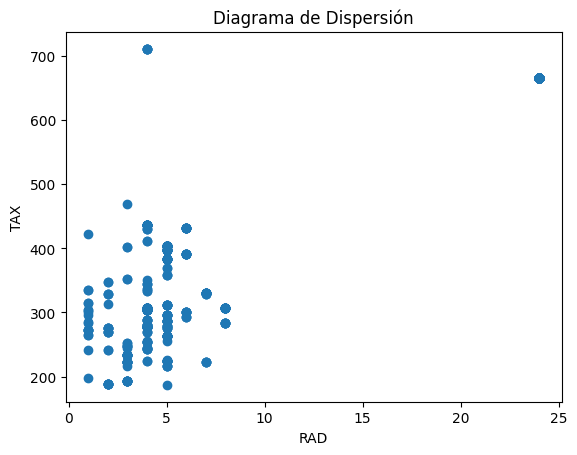

In [ ]:
#Diagrama de dispersion entre RAD Y TAX
import matplotlib.pyplot as plt
plt.scatter(df_boston['RAD'], df_boston['TAX'])
plt.xlabel('RAD')
plt.ylabel('TAX')
plt.title('Diagrama de Dispersión')
plt.show()


La relación entre las dos variables es positiva, por lo tanto se puede decir que la relación entre los impuestos que se pagan y el acceso a la autopista esta relacionado.

Por otro lado se pueden observar un outlier,donde la accesibilidad a las autopistas es alta y los impuestos también son altos. O casas con altos indices de accesabilidad RAD y que pagan pocos impuestos.

Podriamos decir que estas 2 variables estan altamente correlacionadas en terminos de su impacto en los precios de las viviendas.


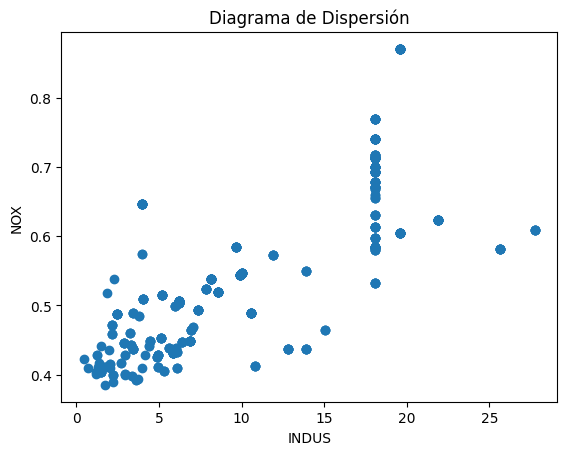

In [ ]:
#Diagrama de dispersion entre NOX e INDUS
import matplotlib.pyplot as plt
plt.scatter(df_boston['INDUS'], df_boston['NOX'])
plt.xlabel('INDUS')
plt.ylabel('NOX')
plt.title('Diagrama de Dispersión')
plt.show()

Los vecindarios con mayor proporción de área industrial tienden a tener niveles más altos de contaminación por óxidos de nitrógeno. Estas variables tienen una correlación positiva de 0.76.


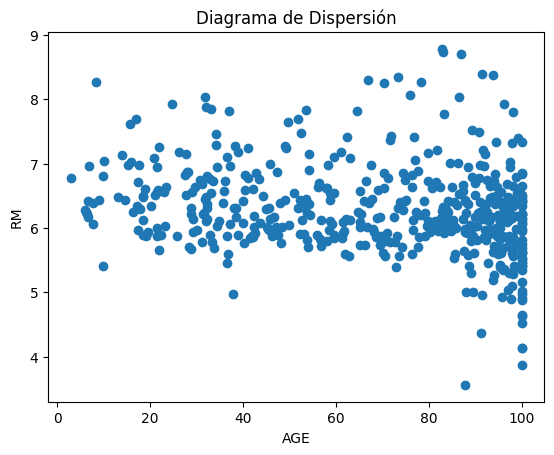

In [ ]:
#Diagrama de dispersion entre AGE e RM
import matplotlib.pyplot as plt
plt.scatter(df_boston['AGE'], df_boston['RM'])
plt.xlabel('AGE')
plt.ylabel('RM')
plt.title('Diagrama de Dispersión')
plt.show()

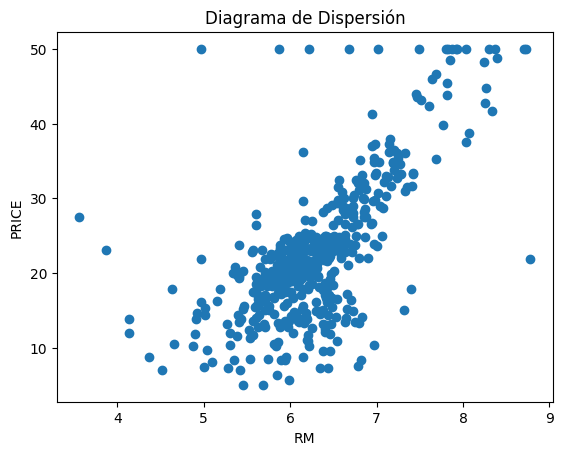

In [ ]:
#Diagrama de dispersion entre RM e PRICE
import matplotlib.pyplot as plt
plt.scatter(df_boston['RM'], df_boston['PRICE'])
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.title('Diagrama de Dispersión')
plt.show()

En este caso se ve claramente que a medida que el precio de las casas aumenta cuanto mas habitaciones tienen, algo logico. Vemos que hay una concentración de los valores entre 5 a 7 habitaciones y que los precios estan comprendidos entre los 15 y 30 mil dolares.

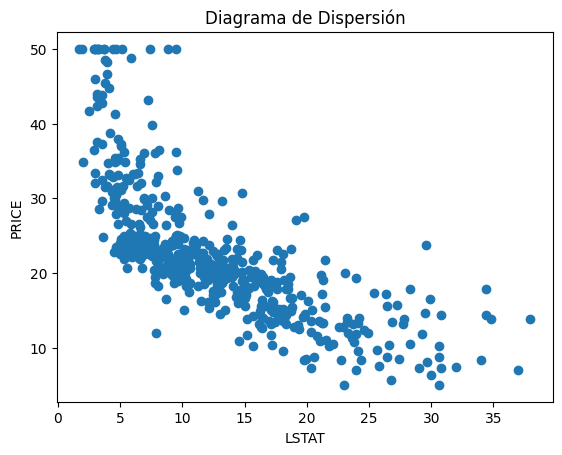

In [ ]:
#Diagrama de dispersion entre LSTAT e PRICE
import matplotlib.pyplot as plt
plt.scatter(df_boston['LSTAT'], df_boston['PRICE'])
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.title('Diagrama de Dispersión')
plt.show()

Como se puede observar en el diagrama de dispersion a medida que el porcentaje de la poblacion que es considerada inferior en terminos socioeconomicos aumenta, se reducen los precios de venta de las viviendas en esas areas.

# **Distribucion de las casas por precio**:
Vamos a realizar una observacion de como se distribuyen los precios de las casas y si podemos sacar alguna agrupación de los precios de las casas y que caracteristicas comparten.

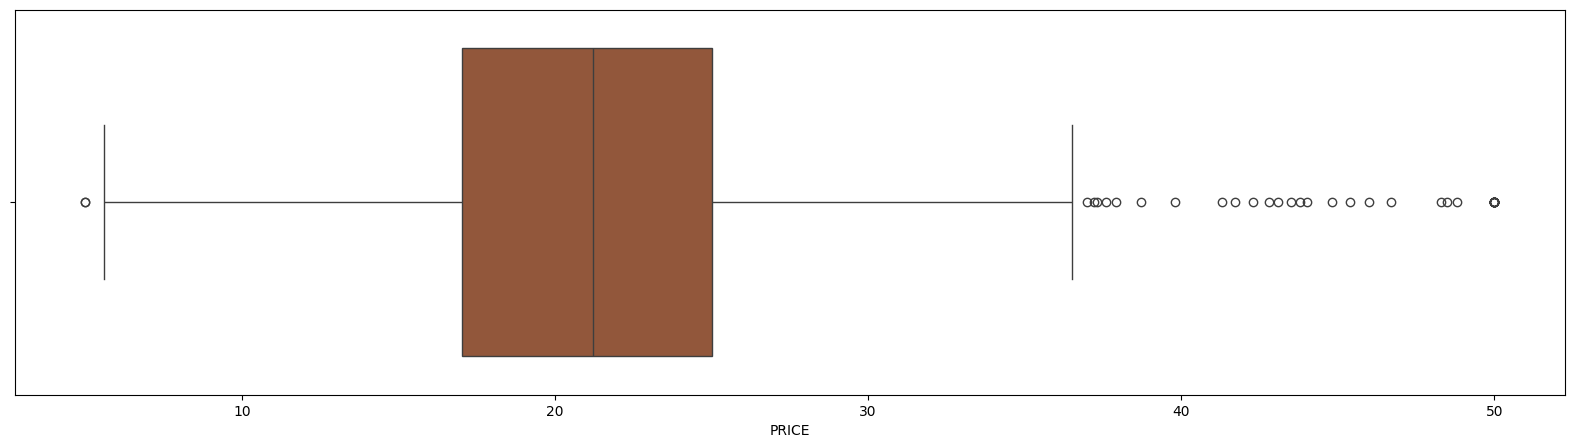

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df_boston["PRICE"], color="sienna");

<ipython-input-40-79747d4f9881>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_boston["PRICE"],


<Axes: xlabel='PRICE'>

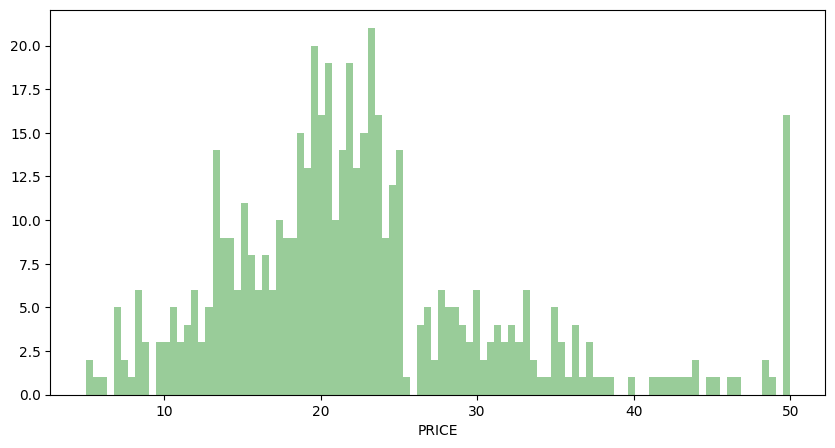

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df_boston["PRICE"],
             kde=False,
             color='g',
             bins=100)

In [ ]:
p_0 = np.percentile(df_boston['PRICE'], 0) #Q0 #Min
p_25 = np.percentile(df_boston['PRICE'], 25) #Q1
p_50 = np.percentile(df_boston['PRICE'], 50) #Q2 #Mediana
p_75 = np.percentile(df_boston['PRICE'], 75) #Q3
p_100 = np.percentile(df_boston['PRICE'], 100) #Q4 #Max

print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)
print("Valor media:", round(df_boston['PRICE'].mean(),2) )

Valor del percentil 0: 5.0
Valor del percentil 25: 17.025
Valor del percentil 50: 21.2
Valor del percentil 75: 25.0
Valor del percentil 100: 50.0
Valor media: 22.53


# Observaciones
Podemos observar que los precios de las casas se distribuyen de la siguiente manera.

Se observa que hay una distribucion **sesgada a la derecha**, lo que indica que tiene un sesgo positivo considerable , la mayoria de las casas tienen precios mas bajo.

Por otro lado hay una pequeña cantidad de casas de hasta 50k dolares, en concreto, 16 casas. Me gustaría estudiar que tienen de especial esas casas más adelante. Me imagino que son casas de lujo pero indagaremos más.






# Observaciones Importantes

He querido crear un subgrupo de los precios de acuerdo a lo que marcaban los percentiles mas importantes pero no reflejan los detalles de como se distribuyen ,por lo tanto, en su lugar, una alternativa **podría ser utilizar percentiles más extremos, como el 10, 25, 75 y 90**, para definir las categorías de precios. Esto permitiría identificar de manera más precisa los valores atípicos y las diferentes modas en la distribución.

Por ejemplo, podrías definir las categorías de la siguiente manera:

Bajo: menor que el percentil 25
Medio: entre el percentil 25 y el 75
Alto: entre el percentil 75 y el 90
Muy alto: mayor que el percentil 90

In [ ]:
percentil_10 = df_boston['PRICE'].quantile(0.1)
percentil_25 = df_boston['PRICE'].quantile(0.25)
percentil_75 = df_boston['PRICE'].quantile(0.75)
percentil_90 = df_boston['PRICE'].quantile(0.9)

# Definir los rangos y etiquetas
bins = [-float('inf'), percentil_25, percentil_75, percentil_90, float('inf')]
etiquetas = ['Bajo', 'Medio', 'Alto', 'Muy Alto']

# Crear la nueva columna categórica
df_boston['Categoria_Precio'] = pd.cut(df_boston['PRICE'], bins=bins, labels=etiquetas)

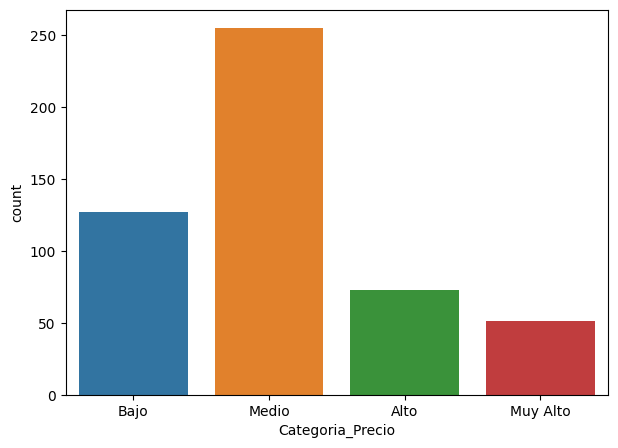

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=df_boston['Categoria_Precio'], hue=df_boston['Categoria_Precio']);

In [ ]:
#Cuantas casas hay para Categoria-Precio
df_boston['Categoria_Precio'].value_counts()

Categoria_Precio
Medio       255
Bajo        127
Alto         73
Muy Alto     51
Name: count, dtype: int64

In [ ]:
df_boston[df_boston['Categoria_Precio'] == 'Muy Alto'].head(10).sort_values(by='PRICE', ascending=False)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Categoria_Precio
161,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0,Muy Alto
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0,Muy Alto
163,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0,Muy Alto
166,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0,Muy Alto
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,Muy Alto
157,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3,Muy Alto
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7,Muy Alto
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,Muy Alto
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4,Muy Alto
40,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9,Muy Alto


Se observan muchas viviendas de 50 mil dolares o más y me gustaria saber que las hace tan especiales. Vamos a analizar sus variables, sobre todo en temas de Criminalidad.


In [ ]:
casas_50k = df_boston[df_boston['PRICE'] == 50]
cantidad_casas_50k = casas_50k.shape[0]
cantidad_casas_50k

16

Hay un total de 16 casas de 50k dolares.


In [ ]:
casas_50k.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,16.000000,16.000000,16.000000,16.000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.0
mean,2.703412,19.062500,11.860625,0.375,0.566569,7.484000,77.637500,2.586087,10.625000,415.437500,16.48125,381.743125,4.355000,50.0
std,3.145228,35.129226,8.187944,0.500,0.089586,1.062342,26.934609,1.592896,9.415413,188.201654,2.88056,12.920621,2.321221,0.0
min,0.013810,0.000000,0.460000,0.000,0.401000,4.970000,24.800000,1.129600,1.000000,193.000000,13.00000,347.880000,1.730000,50.0
25%,0.409203,0.000000,3.647500,0.000,0.500000,6.932750,63.650000,1.350650,4.750000,261.750000,14.62500,375.105000,2.967500,50.0
50%,1.491190,0.000000,18.100000,0.000,0.605000,7.853000,90.200000,2.043300,5.000000,403.000000,14.70000,386.495000,3.510000,50.0
75%,5.091160,20.000000,18.470000,1.000,0.631000,8.099750,96.975000,2.970600,24.000000,666.000000,20.20000,390.925000,4.752500,50.0
max,9.232300,95.000000,19.580000,1.000,0.668000,8.725000,100.000000,5.885000,24.000000,666.000000,20.20000,395.520000,9.530000,50.0


# Observaciones casas 50k

**Tasa de criminalidad (CRIM)**: La media de CRIM es 2.70, lo que indica que estas viviendas de alto precio se encuentran en vecindarios con una tasa de criminalidad relativamente baja.

**Proporción de área industrial (INDUS)**: La media de INDUS es 11.86, lo que podría indicar que algunas de estas viviendas de alto precio se encuentran cerca de áreas industriales.

**Accesibilidad a autopistas radiales (RAD)**: La media de RAD es 10.63, lo que sugiere una buena accesibilidad a las principales autopistas, lo cual suele estar asociado con propiedades de mayor valor.
**Impuestos a la propiedad (TAX)**: Como era de esperarse, la media de TAX es 415.44, lo que indica altos impuestos a la propiedad para estas viviendas de alto precio.

**Número de habitaciones (RM)**: La media de RM es 7.48, lo que sugiere que estas viviendas tienen, en promedio, un gran número de habitaciones.

# Análisis del resto de casas por su valor
Vamos a analizar el restos de casas y ver cuales son sus caracteristicas mas destacables.

1. Análisis de las casas con valor Bajo.

In [ ]:
#Analisis estadistico de las casas con valor Bajo
df_boston[df_boston['Categoria_Precio'] == 'Bajo'].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,10.986203,0.393701,17.018189,0.039370,0.668157,5.886496,92.868504,2.277718,17.141732,567.834646,19.651969,285.830315,21.067795,12.726772
std,14.208815,2.698934,4.641761,0.195244,0.094925,0.592155,9.240411,1.173490,9.479907,153.257837,1.774996,143.964769,5.972431,2.974533
min,0.024980,0.000000,1.890000,0.000000,0.448000,4.138000,37.800000,1.137000,1.000000,188.000000,14.700000,0.320000,7.880000,5.000000
25%,1.513335,0.000000,18.100000,0.000000,0.603000,5.550500,90.550000,1.598450,5.000000,403.000000,20.200000,171.090000,17.115000,10.850000
50%,7.752230,0.000000,18.100000,0.000000,0.679000,5.950000,95.400000,1.866200,24.000000,666.000000,20.200000,363.020000,19.920000,13.400000
75%,13.795750,0.000000,18.100000,0.000000,0.713000,6.342000,98.850000,2.334800,24.000000,666.000000,20.200000,396.660000,24.275000,15.000000
max,88.976200,25.000000,27.740000,1.000000,0.871000,7.313000,100.000000,6.818500,24.000000,711.000000,21.200000,396.900000,37.970000,17.000000


Esta comparación nos muestra que, en general, las viviendas de precios bajos tienden a estar ubicadas en áreas con **mayores tasas de criminalidad**, lo cual es consistente con las expectativas del mercado inmobiliario. Sin embargo, también hay una mayor variabilidad dentro de este subconjunto, lo que sugiere que algunas viviendas de precios bajos pueden estar en áreas más seguras, y viceversa.

Tambien **tienen una media de DIS inferior a la media total** lo cual indica que pueden estar mas alejadas de los centros de empleo.

La **variable Age** indica una **media de 92 años**, son las casas con mas años con diferencia.

Tienen una media de 5 habitaciones menos que el resto de viviendas y el **precio medio es de 12k $**

Tiene un indice medio **LSTAT** de 21 lo que concuerda con un status socieeconomico bajo.

Hay un **dato curioso y es el TAX** que podria ser debido al alto indice de accesabilidad a las autopistas.

La **ZN (Proporción de zona residencial)**:es de las **mas bajas con una media de 0.39**

# Análisis de casas con precio medio

In [ ]:
#Analisis estadistico de las casas con valor Medio
df_boston[df_boston['Categoria_Precio'] == 'Medio'].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,1.310119,9.907843,10.654824,0.054902,0.528615,6.113102,62.919608,4.274889,7.505882,375.827451,18.652157,377.871412,11.673529,21.227843
std,2.873049,20.857181,6.287742,0.228237,0.100393,0.414580,26.687832,2.102887,7.264340,141.208792,1.859193,51.771910,4.631557,2.210544
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.863000,6.000000,1.454700,1.000000,188.000000,13.000000,22.010000,3.590000,17.100000
25%,0.075700,0.000000,5.640000,0.000000,0.448000,5.886500,42.000000,2.513650,4.000000,282.500000,17.800000,381.055000,8.245000,19.400000
50%,0.167600,0.000000,9.690000,0.000000,0.515000,6.108000,66.100000,3.747600,5.000000,311.000000,19.000000,393.290000,11.100000,21.200000
75%,0.633860,12.500000,18.100000,0.000000,0.581000,6.365000,87.500000,5.502700,6.000000,411.000000,20.200000,396.900000,14.115000,23.100000
max,18.811000,85.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,34.370000,25.000000


El **indice CRIM** tiene un valor medio de 1.31 por lo tanto este tipo de casas no se encuentran en lugares de alta criminalidad.

La **tasa ZN** indica una proporcion de zona residencial cercana a la media total.

La **media de AGE es de 62 años**  inferior a las casas de valor bajo.

Tiene un **indice medio LSTAT** de 11 lo que concuerda con un status socieeconomico bajo.

Las casas tienen un **precio medio de 21k $**

# Análisis de casas con precio Alto




In [ ]:
#Analisis estadistico de las casas con valor Alto
df_boston[df_boston['Categoria_Precio'] == 'Alto'].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.656024,25.630137,5.770274,0.109589,0.480056,6.743438,51.661644,4.753190,5.561644,306.739726,17.138356,384.465479,7.047260,29.760274
std,2.262153,30.403653,4.443401,0.314539,0.072476,0.525740,28.016610,2.143492,4.904608,102.126695,2.026260,27.702868,3.332307,2.502817
min,0.009060,0.000000,1.250000,0.000000,0.400000,3.561000,2.900000,1.285200,1.000000,187.000000,12.600000,179.360000,2.940000,25.100000
25%,0.041130,0.000000,2.890000,0.000000,0.433000,6.604000,29.100000,3.215700,3.000000,254.000000,16.000000,384.460000,4.730000,27.900000
50%,0.079780,20.000000,4.860000,0.000000,0.458000,6.782000,49.300000,4.267300,5.000000,284.000000,17.600000,392.200000,6.360000,29.600000
75%,0.190730,40.000000,6.410000,0.000000,0.507000,7.014000,76.500000,6.062200,7.000000,329.000000,18.400000,394.760000,8.050000,31.700000
max,14.438300,100.000000,19.580000,1.000000,0.718000,7.420000,100.000000,12.126500,24.000000,666.000000,20.900000,396.900000,19.780000,34.700000


El **indice CRIM** tiene un valor medio de 1.31 por lo tanto este tipo de casas no se encuentran en lugares de alta criminalidad.

La **tasa ZN** indica una proporcion de zona residencial **mas alta** que la media total de 25. y la tasa **INDUS** es mas baja que la media total.

La **media de AGE es de 51 años**  inferior a las casas de valor bajo.

Tiene un **indice medio LSTAT** de 7 lo que concuerda con un status socieeconomico medio alto.

Las casas tienen un **precio medio de 29k $**

# Análisis de casas con precio muy alto

In [ ]:
#Analisis estadistico de las casas con valor Alto
df_boston[df_boston['Categoria_Precio'] == 'Muy Alto'].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1.004413,25.539216,6.582157,0.156863,0.509388,7.477020,60.564706,3.802778,6.568627,318.137255,16.378431,387.321961,4.620392,43.131373
std,2.088315,33.403419,6.287316,0.367290,0.088048,0.721844,29.898353,1.967295,6.047330,134.199407,2.271679,10.270968,1.938093,6.017192
min,0.013110,0.000000,0.460000,0.000000,0.394000,4.970000,8.400000,1.129600,1.000000,193.000000,13.000000,347.880000,1.730000,34.900000
25%,0.056910,0.000000,2.680000,0.000000,0.437000,7.085500,32.700000,2.150900,3.000000,223.500000,14.700000,383.915000,3.160000,36.750000
50%,0.210380,20.000000,3.970000,0.000000,0.488000,7.520000,62.200000,3.375100,5.000000,264.000000,17.000000,390.300000,4.140000,43.500000
75%,0.576815,39.000000,6.200000,0.000000,0.605000,7.926000,90.200000,5.164950,6.000000,398.000000,17.950000,395.450000,5.225000,50.000000
max,9.232300,95.000000,19.580000,1.000000,0.668000,8.725000,100.000000,8.906700,24.000000,666.000000,20.200000,396.900000,9.530000,50.000000


El **indice CRIM** tiene un valor medio de 1.31 por lo tanto este tipo de casas no se encuentran en lugares de alta criminalidad.

La **tasa ZN** indica una proporcion de zona residencial **más alta** a la media total de 25.

La **media de AGE es de 60 años**  inferior a las casas de valor bajo.

Tiene un **indice medio LSTAT** de 4 lo que concuerda con un status socieeconomico mas alto.

Las casas tienen un **precio medio de 43k $**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

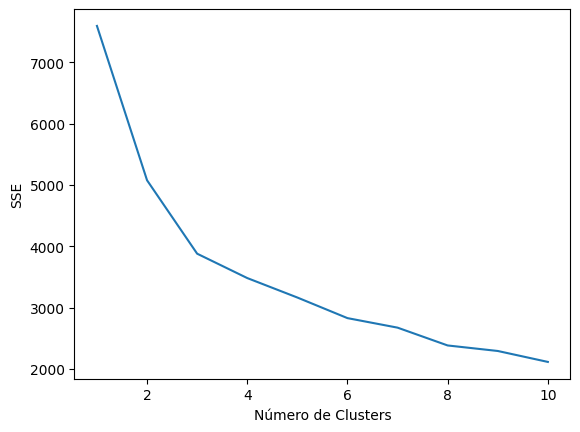

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

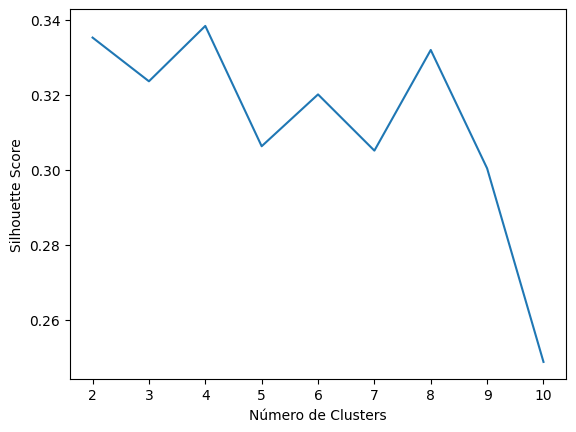

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


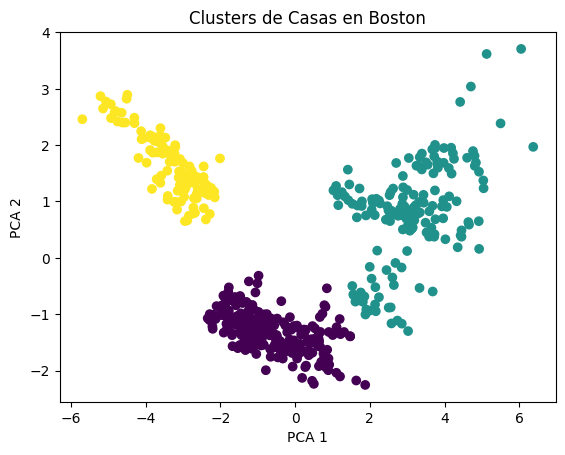

              CRIM         ZN      INDUS      CHAS       NOX        RM  \
Cluster                                                                  
0         0.379483   3.323404   9.109404  0.072340  0.516145  6.219711   
1        10.534719   0.000000  18.806585  0.073171  0.685104  5.958317   
2         0.108136  46.439252   3.833832  0.056075  0.439483  6.927374   

               AGE       DIS        RAD         TAX    PTRATIO           B  \
Cluster                                                                      
0        67.958723  3.912794   4.502128  306.961702  18.265957  382.752170   
1        91.020122  1.996222  20.189024  626.560976  19.767073  298.178963   
2        35.526168  6.293502   4.327103  296.037383  16.861682  389.055607   

             LSTAT      PRICE  
Cluster                        
0        11.387149  22.851915  
1        18.880000  16.240244  
2         5.889252  31.476636  
Varianza explicada por cada componente: [0.43872016 0.13009608]
Componentes pr

In [ ]:
# Paso 1: Cargar y Preprocesar los Datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Estandarizar las características
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_boston)

# Paso 2: Realizar el Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

# Coeficiente de silueta
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Ejemplo con 3 clusters
df_boston['Cluster'] = kmeans.fit_predict(data_scaled)

# Paso 3: Analizar los Resultados del Clustering
from sklearn.decomposition import PCA

# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_boston['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters de Casas en Boston')
plt.show()

# Interpretar los clusters
cluster_summary = df_boston.groupby('Cluster').mean()
print(cluster_summary)

# Analizar los componentes de PCA
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Componentes principales:\n", pca.components_)

# Interpretar los clusters
cluster_summary = df_boston.groupby('Cluster').mean()
print(cluster_summary)

# Analizar los componentes de PCA
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Componentes principales:\n", pca.components_)

# Interpretar los clusters
cluster_summary = df_boston.groupby('Cluster').mean()
print(cluster_summary)


In [ ]:
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)


Varianza explicada por cada componente: [0.43872016 0.13009608]


0.43872016: El primer componente principal (PC1) explica aproximadamente el 43.87% de la varianza total en los datos.
0.13009608: El segundo componente principal (PC2) explica aproximadamente el 13.01% de la varianza total en los datos.
En conjunto, los dos primeros componentes principales explican aproximadamente el 56.88% de la varianza en los datos originales. Esto indica que estos dos componentes capturan más de la mitad de la información contenida en las características originales.

In [ ]:
print("Componentes principales:\n", pca.components_)


Componentes principales:
 [[ 0.23799693 -0.25193075  0.33045937 -0.00459468  0.32329614 -0.20545043
   0.29861219 -0.29954551  0.297629    0.31825237  0.20783837 -0.19336698
   0.31082977 -0.26763682 -0.07960554]
 [ 0.2876625   0.38934744  0.0044472  -0.05085933  0.02842103  0.22679634
  -0.14704985  0.12576464  0.34247775  0.31198741 -0.02590595 -0.23872933
  -0.05668967  0.10442215  0.6220611 ]]


Los componentes principales son combinaciones lineales de las características originales. Cada valor en la matriz de componentes principales representa la contribución de una característica original a un componente principal. Vamos a interpretar los dos primeros componentes:

Componente Principal 1 (PC1)
Tiene contribuciones significativas (en valor absoluto) de varias características, como INDUS, NOX, AGE, DIS, TAX, PTRATIO, y LSTAT.
Por ejemplo, la característica INDUS tiene una contribución de 0.33045937 a PC1, indicando que es una de las características más influyentes en este componente.
Componente Principal 2 (PC2)
Las características ZN, DIS, y B tienen contribuciones significativas en PC2.
Por ejemplo, la característica B tiene una contribución de 0.6220611 a PC2, indicando que es una característica altamente influyente en este componente.
3. Resumen de los Clusters
El análisis del clustering nos proporciona el promedio de las características para cada cluster. Esto ayuda a entender las características típicas de cada grupo de casas. Aquí está el resumen:

In [ ]:
print(cluster_summary)


              CRIM         ZN      INDUS      CHAS       NOX        RM  \
Cluster                                                                  
0         0.379483   3.323404   9.109404  0.072340  0.516145  6.219711   
1        10.534719   0.000000  18.806585  0.073171  0.685104  5.958317   
2         0.108136  46.439252   3.833832  0.056075  0.439483  6.927374   

               AGE       DIS        RAD         TAX    PTRATIO           B  \
Cluster                                                                      
0        67.958723  3.912794   4.502128  306.961702  18.265957  382.752170   
1        91.020122  1.996222  20.189024  626.560976  19.767073  298.178963   
2        35.526168  6.293502   4.327103  296.037383  16.861682  389.055607   

             LSTAT      PRICE  
Cluster                        
0        11.387149  22.851915  
1        18.880000  16.240244  
2         5.889252  31.476636  


Cluster 0: Representa casas con características moderadas en términos de criminalidad (CRIM), tamaño de lotes residenciales (ZN), proporción de terrenos industriales (INDUS), y otras características. Estas casas tienen un precio medio de 22.85.
Cluster 1: Agrupa casas en áreas con alta criminalidad, densamente pobladas y con alta proporción de terrenos industriales. Estas casas tienen un precio medio más bajo, de 16.24.
Cluster 2: Incluye casas en áreas más prósperas, con bajas tasas de criminalidad, mayores tamaños de lotes residenciales y mejores indicadores socioeconómicos. Estas casas tienen un precio medio más alto, de 31.48.
Visualización
La visualización de los clusters en el espacio reducido por PCA muestra cómo se agrupan las casas según las dos primeras componentes principales.

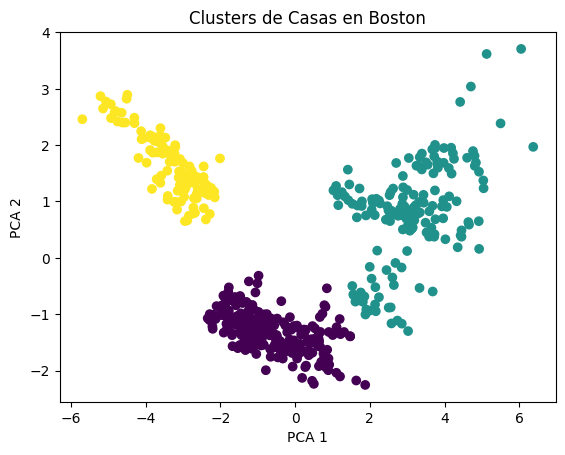

In [ ]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_boston['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters de Casas en Boston')
plt.show()


Este gráfico nos permite ver cómo se distribuyen las casas en el espacio de las dos primeras componentes principales y cómo se agrupan en clusters distintos.

Conclusiones
Varianza Explicada: Los dos primeros componentes principales explican el 56.88% de la varianza en los datos originales.
Componentes Principales: Las características más influyentes en PC1 y PC2 nos ayudan a entender las dimensiones a lo largo de las cuales se agrupan los datos.
Clusters: Los clusters identificados nos dan una idea de diferentes grupos de casas en Boston con características socioeconómicas y geográficas similares.
Visualización: La visualización en el espacio de las componentes principales proporciona una vista clara de cómo se forman los clusters.
Esta metodología de análisis no supervisado nos permite obtener una comprensión profunda de los patrones subyacentes en los datos de las casas de Boston, identificando grupos con características similares y proporcionando insights valiosos para estudios adicionales o aplicaciones prácticas.







# FIN